KNN project

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv("KNN_Project_Data")
df.shape

(1000, 11)

In [4]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


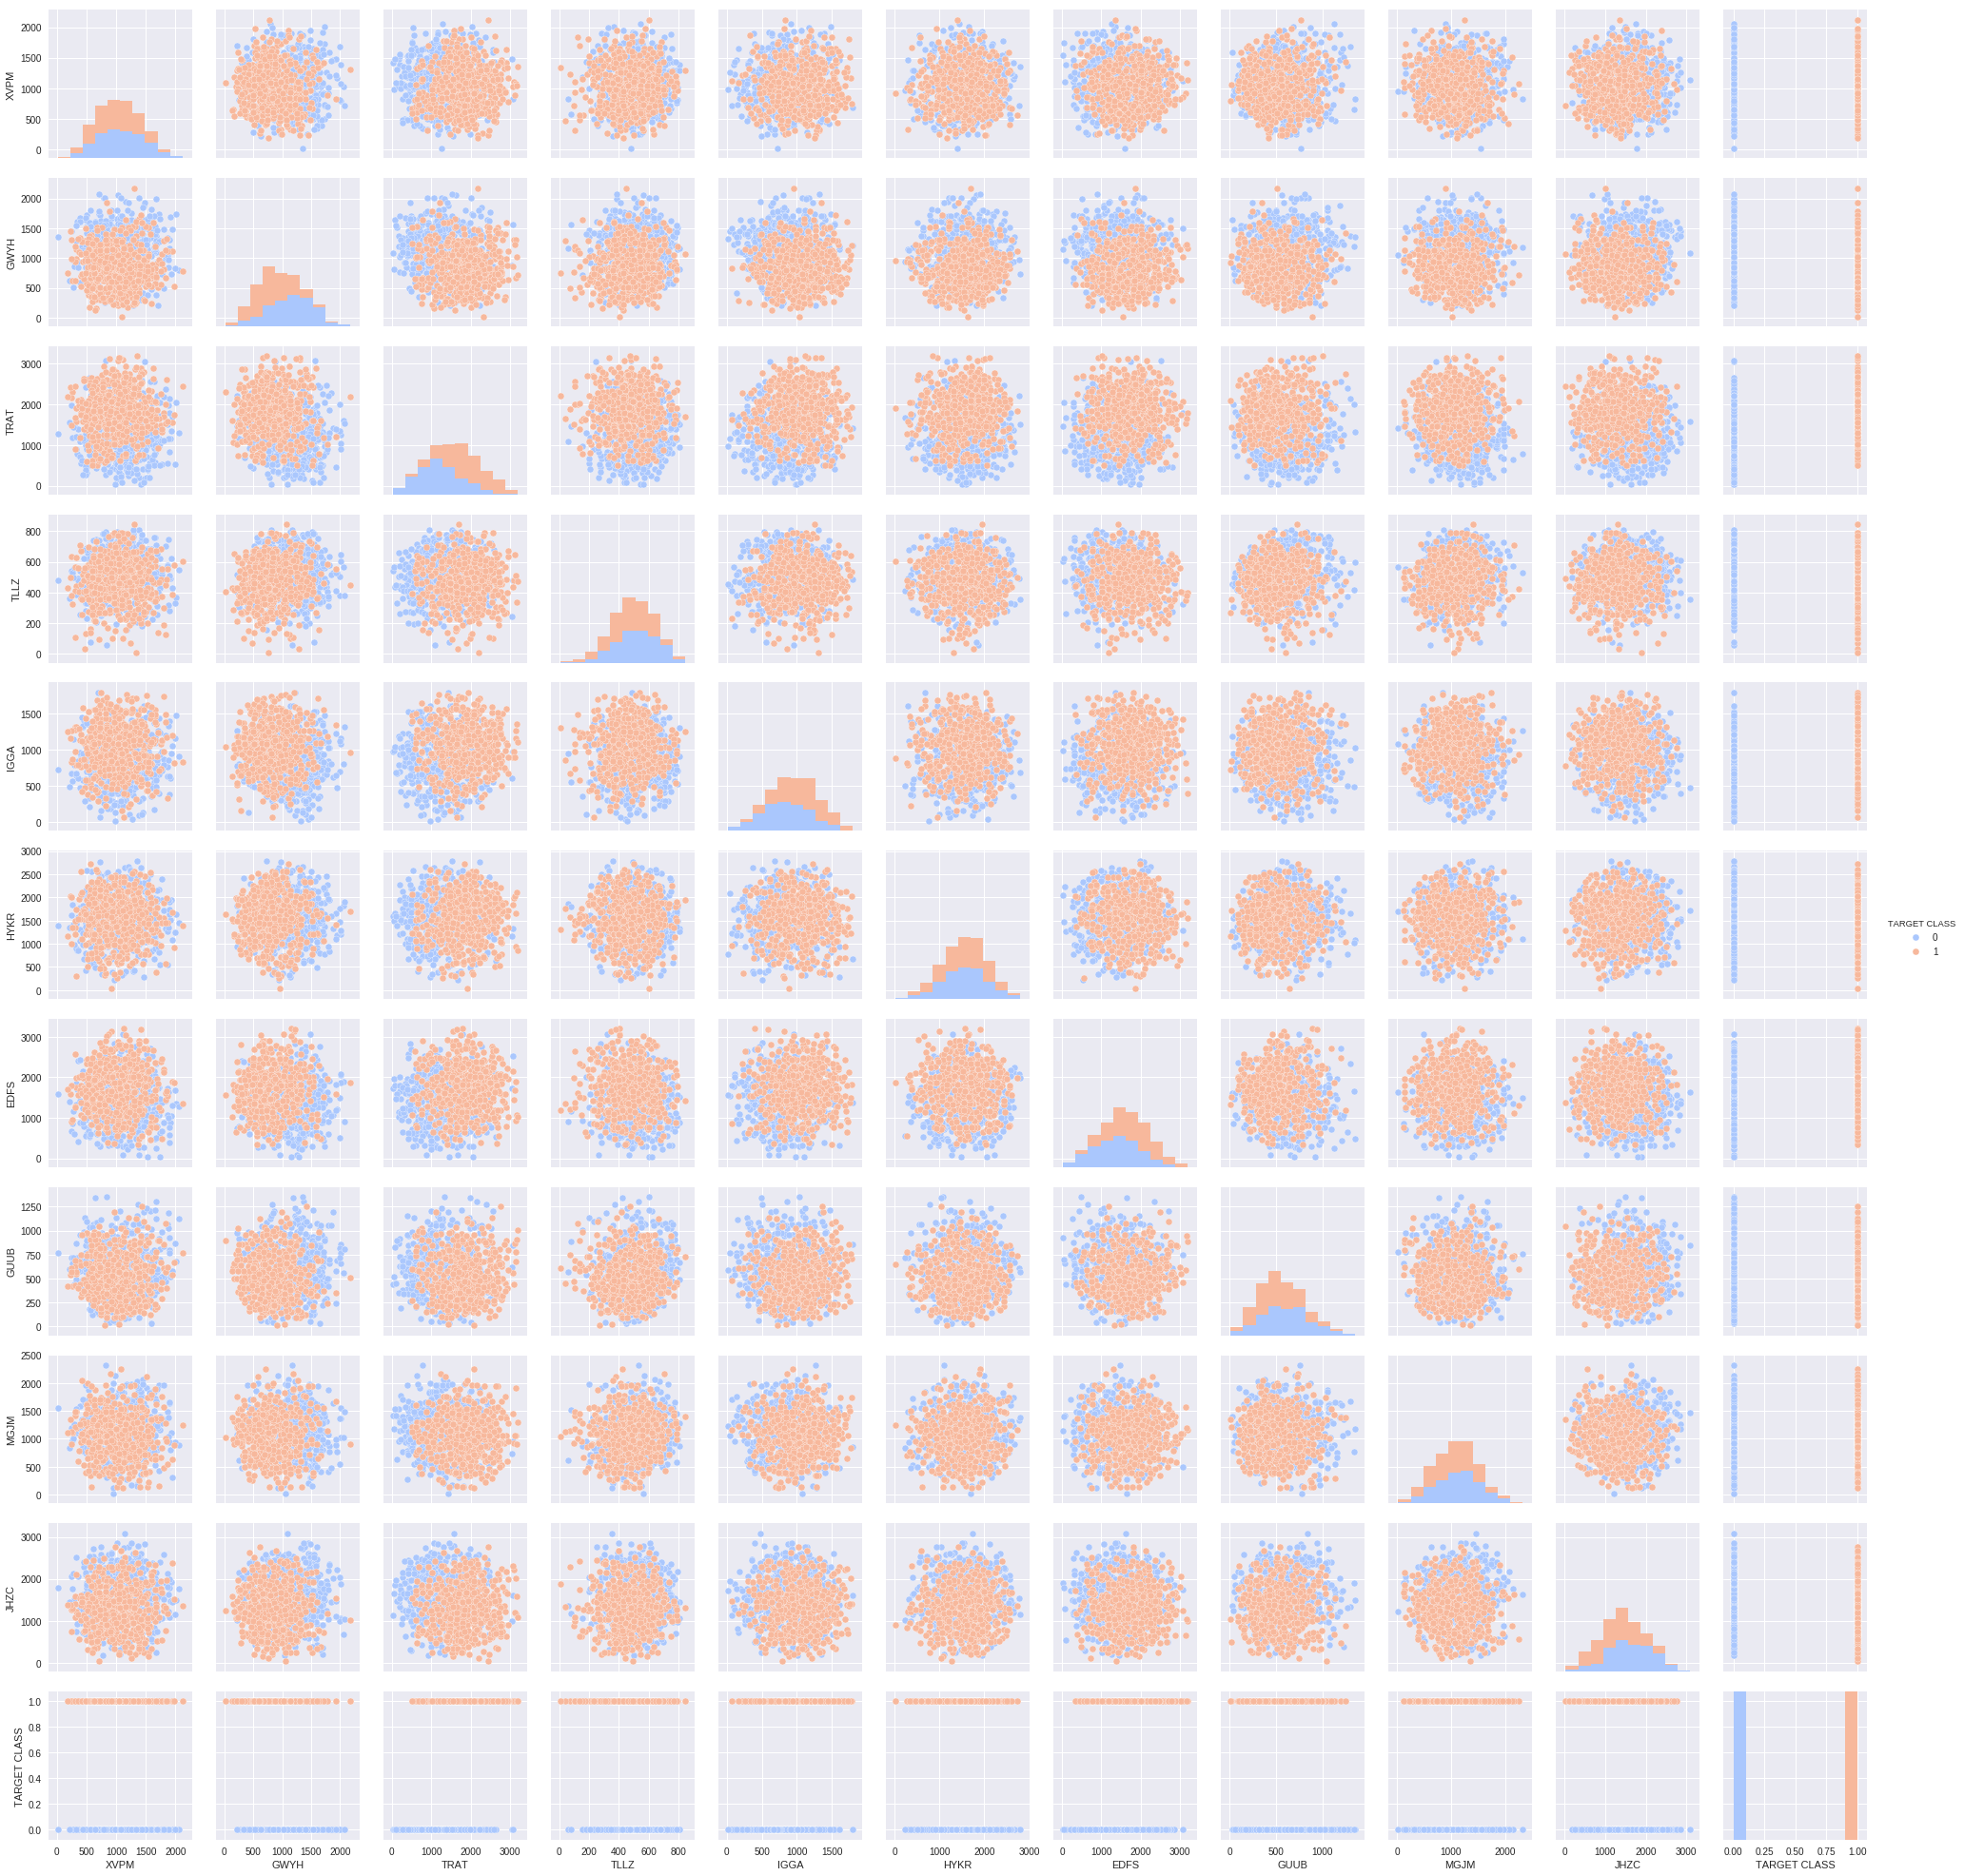

In [40]:
sns.pairplot(df,hue='TARGET CLASS',palette='coolwarm')

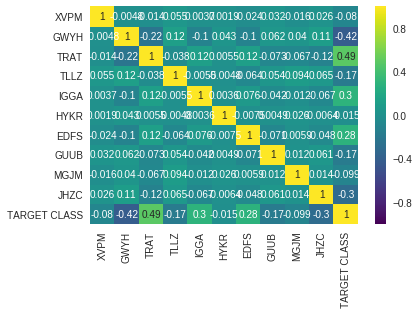

In [44]:
cr = df.corr()
sns.heatmap(cr,cmap='viridis',annot=True)
plt.figure(figsize=(12,8))

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
X = scaler.fit_transform(df.drop('TARGET CLASS',axis =1))

In [12]:
y = df['TARGET CLASS']

In [13]:
from sklearn.cross_validation import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

Model building

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
knn = KNeighborsClassifier(n_neighbors=1)

In [26]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [27]:
pred = knn.predict(X_test)

In [28]:
print(confusion_matrix(pred,y_test))
print(classification_report(pred,y_test))

[[109  41]
 [ 43 107]]
             precision    recall  f1-score   support

          0       0.72      0.73      0.72       150
          1       0.72      0.71      0.72       150

avg / total       0.72      0.72      0.72       300



L bow method

In [36]:
error = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i!= y_test))

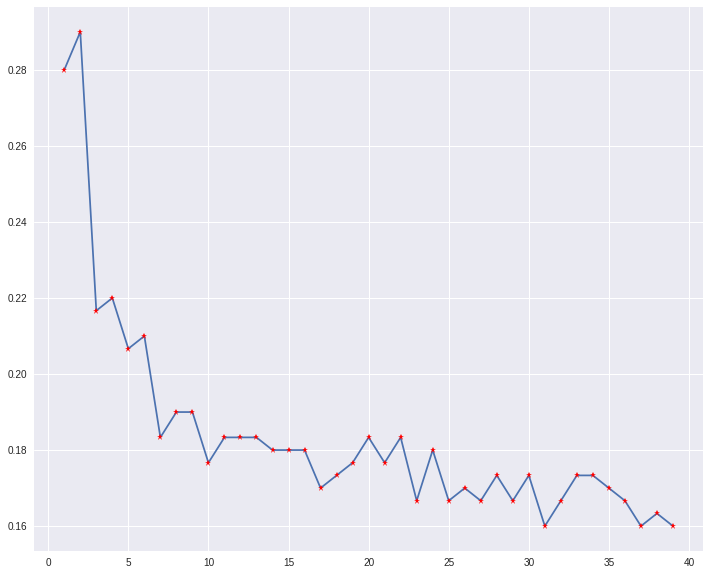

In [37]:
plt.figure(figsize=(12,10))
plt.plot(range(1,40),error,marker='*',markerfacecolor='red')

In [38]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)
pred_30 = knn.predict(X_test)

In [39]:
print(confusion_matrix(pred_30,y_test))
print(classification_report(pred_30,y_test))

[[124  24]
 [ 28 124]]
             precision    recall  f1-score   support

          0       0.82      0.84      0.83       148
          1       0.84      0.82      0.83       152

avg / total       0.83      0.83      0.83       300

